<a href="https://colab.research.google.com/github/UnknownHubResident/GDGOC_ML_study_session_4/blob/main/data_cleansing_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the goods

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


%matplotlib inline

# **Dataset 1: the Statistic of passenger using space travel agency within the solar system**

1.1 The raw data table and the its column properties

In [ ]:
TB_SHP_RAW = pd.read_csv('/content/SHP.csv')

TB_SHP_RAW.head(10)

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,1,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,2,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
3,3,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
4,4,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,Candra Jacostaffey,True
5,5,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
6,6,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
7,7,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
8,8,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
9,9,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True


In [ ]:
TB_SHP_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    12138 non-null  int64 
 1   PassengerId   12138 non-null  object
 2   HomePlanet    11985 non-null  object
 3   CryoSleep     11955 non-null  object
 4   Cabin         11982 non-null  object
 5   Destination   11981 non-null  object
 6   Age           11993 non-null  object
 7   VIP           11963 non-null  object
 8   RoomService   12002 non-null  object
 9   FoodCourt     11991 non-null  object
 10  ShoppingMall  11964 non-null  object
 11  Spa           11985 non-null  object
 12  VRDeck        11975 non-null  object
 13  Name          11973 non-null  object
 14  Transported   12138 non-null  bool  
dtypes: bool(1), int64(1), object(13)
memory usage: 1.3+ MB


1.2. reformatting the raw data table

In [ ]:
reformat_col_TB_SHP = ['Unnamed: 0', 'PassengerId', 'Name']
Amended_TB_SHP = TB_SHP_RAW.drop(reformat_col_TB_SHP, axis=1)
Amended_TB_SHP.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
2,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
3,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
4,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,True
5,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
6,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True
7,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,True
8,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,True
9,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,True


In [16]:
# Converting object to float

Col_Data_Type_fix_float = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
Amended_TB_SHP[Col_Data_Type_fix_float] = Amended_TB_SHP[Col_Data_Type_fix_float].replace('-', np.nan)
Amended_TB_SHP[Col_Data_Type_fix_float] = Amended_TB_SHP[Col_Data_Type_fix_float].astype(float)
Amended_TB_SHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11985 non-null  object 
 1   CryoSleep     11955 non-null  object 
 2   Cabin         11982 non-null  object 
 3   Destination   11981 non-null  object 
 4   Age           11923 non-null  float64
 5   VIP           11963 non-null  object 
 6   RoomService   11933 non-null  float64
 7   FoodCourt     11915 non-null  float64
 8   ShoppingMall  11882 non-null  float64
 9   Spa           11918 non-null  float64
 10  VRDeck        11889 non-null  float64
 11  Transported   12138 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 1.0+ MB


In [17]:
# Converting object to boolean

Col_Data_Type_fix_Bool = ['CryoSleep','VIP']
Amended_TB_SHP[Col_Data_Type_fix_Bool] = Amended_TB_SHP[Col_Data_Type_fix_Bool].astype(bool)
Amended_TB_SHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11985 non-null  object 
 1   CryoSleep     12138 non-null  bool   
 2   Cabin         11982 non-null  object 
 3   Destination   11981 non-null  object 
 4   Age           11923 non-null  float64
 5   VIP           12138 non-null  bool   
 6   RoomService   11933 non-null  float64
 7   FoodCourt     11915 non-null  float64
 8   ShoppingMall  11882 non-null  float64
 9   Spa           11918 non-null  float64
 10  VRDeck        11889 non-null  float64
 11  Transported   12138 non-null  bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 889.1+ KB


1.3. fixing represntation of data in histogram

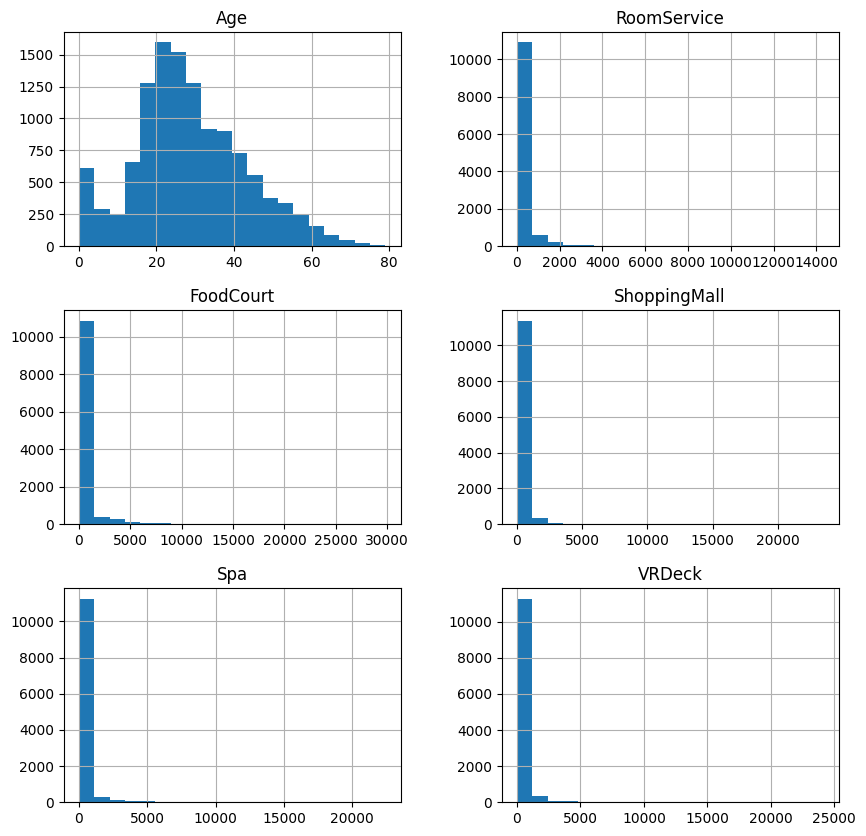

In [19]:
Amended_TB_SHP.replace([np.inf, -np.inf], np.nan, inplace=True)
Amended_TB_SHP[Col_Data_Type_fix_float].hist(bins = 20, figsize = (10,10))
plt.show()

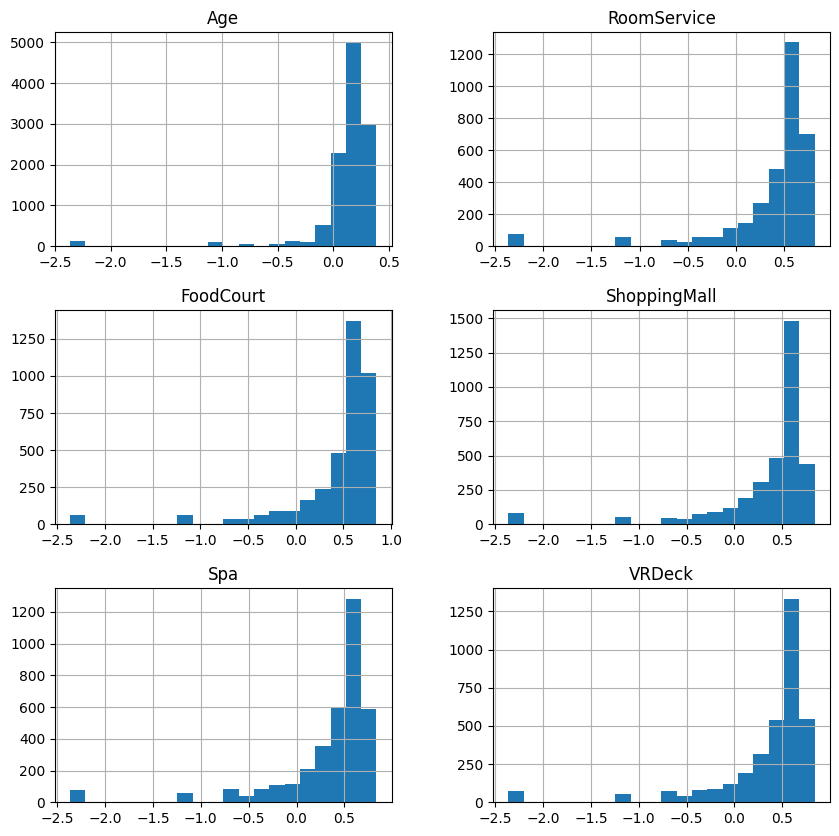

In [22]:
Amended_TB_SHP.replace([np.inf, -np.inf], np.nan, inplace=True)
Amended_TB_SHP[Col_Data_Type_fix_float] = np.log(Amended_TB_SHP[Col_Data_Type_fix_float] + 1e-6)
Amended_TB_SHP[Col_Data_Type_fix_float].hist(bins = 20, figsize = (10,10))
plt.show()